### download dataset from here 
https://uc.hackerearth.com/he-public-data/dataset1c2f4b7.zip

### or from here

In [ ]:
!pip install gdown

In [ ]:
import gdown

file_id = '1yOcjImqJwK9IsC9B5V2nDOADv9eC-Jh1'
url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(url, quiet=False)


# Data processing

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [128]:
df = pd.read_csv('train.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()

,text,target,Word Count
0,"python courses python courses, python exercise...",academic interests,125
1,the learning point open digital education. a r...,academic interests,147
2,"tech news, latest technology, mobiles, laptops...",academic interests,143
3,the best it certification materials in usa | k...,academic interests,364
4,"bioland scientific, for your research needs bi...",academic interests,176


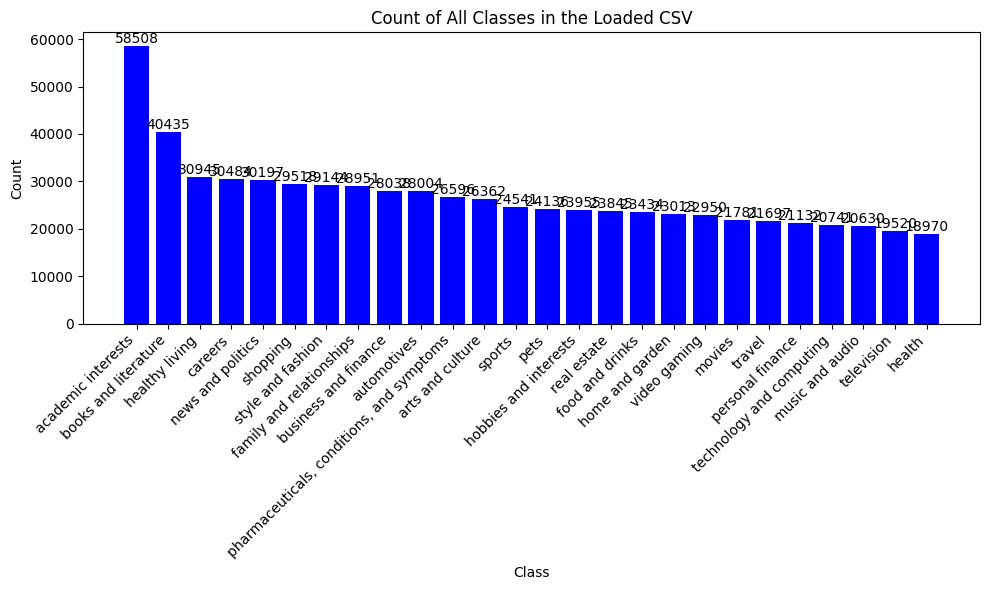

In [129]:
# Step 2: Count unique values in the DataFrame
count = df['target'].value_counts().reset_index()
count.columns = ['target', 'Count']

# Step 3: Plot the counts for all classes
plt.figure(figsize=(10, 6))

# Bar plot for counts
plt.bar(count['target'], count['Count'], color='blue')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of All Classes in the Loaded CSV')

# Annotate counts on the plot
for i in range(len(count)):
    plt.annotate(f'{count["Count"].iloc[i]}', 
                 xy=(count['target'].iloc[i], count['Count'].iloc[i] + 0.5),
                 ha='center', va='bottom', color='black')

# Add x-ticks
plt.xticks(ticks=range(len(count)), labels=count['target'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [130]:
# Check for duplicate rows based on 'text' and 'target' columns
# 'keep' is set to 'first' to retain the first occurrence of a duplicate and remove the rest
duplicates = df.duplicated(subset=['text', 'target'], keep='first')

# Remove the duplicate rows
df = df[~duplicates]

print(duplicates)
print(df)


0         False
1         False
2         False
3         False
4         False
          ...  
697522    False
697523    False
697524    False
697525    False
697526    False
Length: 697527, dtype: bool
                                                     text              target  \
0       python courses python courses, python exercise...  academic interests   
1       the learning point open digital education. a r...  academic interests   
2       tech news, latest technology, mobiles, laptops...  academic interests   
3       the best it certification materials in usa | k...  academic interests   
4       bioland scientific, for your research needs bi...  academic interests   
...                                                   ...                 ...   
697522  so while it might be hard to look at at times,...        video gaming   
697523  thatâ¦ You know, let's do a musical. We'll ju...        video gaming   
697524  PlayStation or Xbox, don't worry about being l...        vi

In [131]:
# View the duplicates before removing them
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [text, target, Word Count]
Index: []


/tmp/ipykernel_3658589/2385761876.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows = df[duplicates]


In [132]:
import pandas as pd

# Step 2: Define the specific class you're interested in
specific_class = 'academic interests'  # Change this to your specific class

# Step 3: Filter the dataset for the specific class
class_df = df[df['target'] == specific_class].copy()

# Step 4: Calculate word count for each row in the 'text' column for the specific class
class_df['word_count'] = class_df['text'].apply(lambda x: len(x.split()))

# Step 5: Calculate the thresholds for top and bottom 5% for the specific class
lower_threshold = class_df['word_count'].quantile(0.15)  # Bottom 5%
upper_threshold = class_df['word_count'].quantile(0.95)  # Top 5%

# Step 6: Filter out the rows with word counts in the top and bottom 5%
filtered_class_df = class_df[(class_df['word_count'] > lower_threshold) & (class_df['word_count'] < upper_threshold)]

# Step 7: Prepare to save the filtered class with all other classes unchanged
# Filter the rest of the classes
other_classes_df = df[df['target'] != specific_class]

# Step 8: Combine the filtered specific class DataFrame with the rest of the classes
df = pd.concat([filtered_class_df, other_classes_df], ignore_index=True)

In [133]:
df.head()


,text,target,Word Count,word_count
0,the best it certification materials in usa | k...,academic interests,364,364.0
1,"bioland scientific, for your research needs bi...",academic interests,176,176.0
2,"astronomy magazine - interactive star charts, ...",academic interests,237,237.0
3,A huge phytoplankton bloom has lit up the Blac...,academic interests,438,438.0
4,What happens to diamonds when they are billion...,academic interests,423,423.0


In [134]:
import re

# Preprocessing function to remove unwanted characters
def remove_punctuations(text):
    text = re.sub(r'[\\-]', ' ', text)
    text = re.sub(r'[,.?;:\'(){}!|0-9]', '', text)
    return text

# Apply preprocessing to the text
df['text'] = df['text'].apply(remove_punctuations)

# Display the cleaned dataset
df.head()

,text,target,Word Count,word_count
0,the best it certification materials in usa ki...,academic interests,364,364.0
1,bioland scientific for your research needs bio...,academic interests,176,176.0
2,astronomy magazine interactive star charts p...,academic interests,237,237.0
3,A huge phytoplankton bloom has lit up the Blac...,academic interests,438,438.0
4,What happens to diamonds when they are billion...,academic interests,423,423.0


In [135]:
import nltk
from nltk.corpus import stopwords

# english stopwords
stopw = stopwords.words('english')
stopw[:10]

def remove_stopwords(text):
    clean_text = []
    for word in text.split(' '):
        if word not in stopw:
            clean_text.append(word)
    return ' '.join(clean_text)

# remove stopwords
df['text'] = df['text'].apply(remove_stopwords)

df.head()


,text,target,Word Count,word_count
0,best certification materials usa killtest lea...,academic interests,364,364.0
1,bioland scientific research needs bioland scie...,academic interests,176,176.0
2,astronomy magazine interactive star charts p...,academic interests,237,237.0
3,A huge phytoplankton bloom lit Black Sea Bospo...,academic interests,438,438.0
4,What happens diamonds billions years old Scien...,academic interests,423,423.0


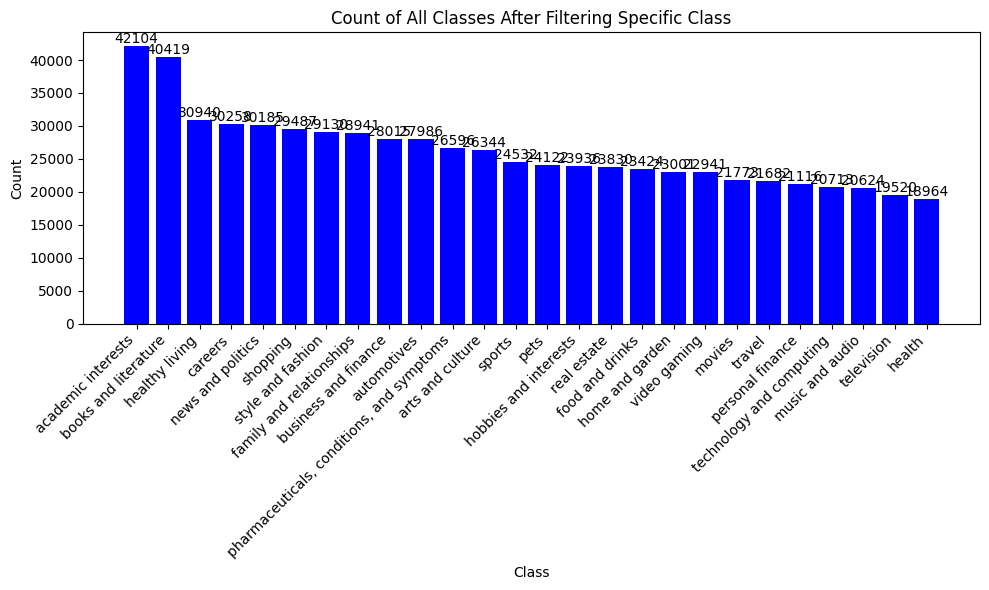

In [138]:
# Count unique values in the DataFrame
count = df['target'].value_counts().reset_index()
count.columns = ['target', 'Count']

# Plot the counts for all classes
plt.figure(figsize=(10, 6))

# Bar plot for counts
plt.bar(count['target'], count['Count'], color='blue')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of All Classes After Filtering Specific Class')

# Annotate counts on the plot
for i in range(len(count)):
    plt.annotate(f'{count["Count"].iloc[i]}', 
                 xy=(count['target'].iloc[i], count['Count'].iloc[i] + 0.5),
                 ha='center', va='bottom', color='black')

# Add x-ticks
plt.xticks(ticks=range(len(count)), labels=count['target'], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [137]:
df.to_csv('final_pro.csv', index=False)

print("Filtered dataset saved")

Filtered dataset saved


# Training

In [139]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import (AutoTokenizer, DataCollatorWithPadding,
                          RobertaForSequenceClassification,
                          TrainingArguments, Trainer, EarlyStoppingCallback)
from datasets import Dataset
import torch


In [140]:
# Load dataset
df = pd.read_csv('final_pro.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()


,text,target,Word Count,word_count
0,best certification materials usa killtest lea...,academic interests,364,364.0
1,bioland scientific research needs bioland scie...,academic interests,176,176.0
2,astronomy magazine interactive star charts p...,academic interests,237,237.0
3,A huge phytoplankton bloom lit Black Sea Bospo...,academic interests,438,438.0
4,What happens diamonds billions years old Scien...,academic interests,423,423.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680585 entries, 0 to 680584
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   text        680585 non-null  object 
 1   target      680585 non-null  object 
 2   Word Count  680585 non-null  int64  
 3   word_count  42106 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.8+ MB


In [110]:
# Text before preprocessing
print(df['text'][1])

bioland scientific research needs bioland scientific     buffers chemicals gloves transfection reagent genotyping reagents pcr reagents supplies sirna microrna enzymes pipette tips bacteria culture supplies slides box mailer water purification parts bottles & cubitainers cell culture supplies freezer tubes boxes rephile system parts western blot products dna rna virus purification centrifuge tubes qpcr rt pcr reagents liquid handling equipment pipettes water purification system water purification q&a labeling tapes face masks ppe covid  testing supplies robotic tips bioland biot dna kit bioland scientific bioland scientific llc ca buffers chemicals gloves transfection reagent genotyping reagents pcr reagents supplies sirna microrna enzymes pipette tips bacteria culture supplies slides  box mailer water purification parts bottles & cubitainers cell culture supplies freezer tubes boxes rephile system parts western blot products dna  rna  virus purification centrifuge tubes qpcr rt pcr re

In [111]:
torch.cuda.empty_cache()

In [112]:
# Split dataset into training and testing sets
train_df, test_df = train_test_split(df[['text', 'target']], train_size=0.8, shuffle=True)

# Display the shapes of the training and testing sets
print(train_df.shape, test_df.shape)


(544468, 2) (136117, 2)


In [113]:
# Check device and set the model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Use Roberta tokenizer instead of BERT tokenizer
model_name = 'roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_name)


Using device: cuda


In [114]:
# Preprocessing and dataset pipeline functions
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length', max_length=512)

def create_label_mapping(dataframe):
    unique_labels = dataframe['target'].unique()
    label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    return label_mapping

def pipeline(dataframe, label_mapping):
    dataset = Dataset.from_pandas(dataframe, preserve_index=False)
    tokenized_ds = dataset.map(preprocess_function, batched=True)

    # Map the string labels to integers
    tokenized_ds = tokenized_ds.map(lambda x: {'labels': label_mapping[x['target']]})
    tokenized_ds = tokenized_ds.remove_columns('text')  # Remove text column if not needed
    return tokenized_ds


In [115]:
label_mapping = create_label_mapping(train_df)

# Print the label mapping
print("Label Mapping:")
for label, idx in label_mapping.items():
    print(f"{idx}: {label}")

tokenized_train = pipeline(train_df, label_mapping)
tokenized_test = pipeline(test_df, label_mapping)

Label Mapping:
0: sports
1: style and fashion
2: healthy living
3: business and finance
4: real estate
5: technology and computing
6: video gaming
7: music and audio
8: careers
9: automotives
10: news and politics
11: food and drinks
12: movies
13: travel
14: books and literature
15: health
16: arts and culture
17: personal finance
18: hobbies and interests
19: pharmaceuticals, conditions, and symptoms
20: pets
21: shopping
22: academic interests
23: home and garden
24: family and relationships
25: television


Map: 100%|██████████| 136117/136117 [00:12<00:00, 10633.79 examples/s]


In [116]:
# Create label mappings (label2id and id2label)
label2id = label_mapping  # label name to id
id2label = {v: k for k, v in label_mapping.items()}  # id to label name


In [117]:
# Use RobertaForSequenceClassification instead of BERT
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=len(label_mapping))
model.to(device)

# Add label mappings to the model's config
model.config.label2id = label2id
model.config.id2label = id2label

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [119]:
from sklearn.metrics import accuracy_score

# Define the compute_metrics function to calculate accuracy
def compute_metrics(p):
    predictions, labels = p
    preds = predictions.argmax(axis=-1)  # Get the predicted class indices
    accuracy = accuracy_score(labels, preds)
    return {'accuracy': accuracy}


In [120]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback, DataCollatorWithPadding

# Define training arguments with early stopping
training_args = TrainingArguments(
    output_dir="./results",
    save_strategy='epoch',  # Save the model after each epoch
    optim='adamw_torch',  # Use AdamW optimizer
    learning_rate=2e-5,  # Learning rate
    per_device_train_batch_size=16,  # Batch size for training
    num_train_epochs=3,  # Total number of epochs
    weight_decay=0.01,  # Weight decay for regularization
    evaluation_strategy="epoch",  # Evaluate after each epoch
    load_best_model_at_end=True,  # Load the best model based on evaluation
    metric_for_best_model="accuracy",  # Use accuracy to determine the best model
    greater_is_better=True,  # We want the accuracy to increase
    logging_dir='./logs',  # Directory for storing logs
    logging_steps=500,  # Log every 500 steps
    eval_steps=500,  # Evaluate every 500 steps
    save_total_limit=1,  # Limit the number of saved models
    fp16=True,  # Enable FP16 mixed precision training
)

# Define early stopping criteria
early_stopping_callback = EarlyStoppingCallback(
    early_stopping_patience=3,  # Stop training after 3 epochs of no improvement
    early_stopping_threshold=0.01  # Minimum improvement threshold
)

# Create data collator for padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Create the Trainer with early stopping callback and compute_metrics
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    callbacks=[early_stopping_callback],  # Add early stopping callback
    compute_metrics=compute_metrics,  # Add the compute_metrics function
)


/home/editha/model/.venv/lib/python3.10/site-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_3658589/192392671.py:33: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [121]:
import matplotlib.pyplot as plt

# Train the model
trainer.train()

# Get the training and evaluation accuracies and losses from log_history
train_accuracy = [x['train_accuracy'] for x in trainer.state.log_history if 'train_accuracy' in x]
eval_accuracy = [x['eval_accuracy'] for x in trainer.state.log_history if 'eval_accuracy' in x]

train_loss = [x['train_loss'] for x in trainer.state.log_history if 'train_loss' in x]
eval_loss = [x['eval_loss'] for x in trainer.state.log_history if 'eval_loss' in x]


/home/editha/model/.venv/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

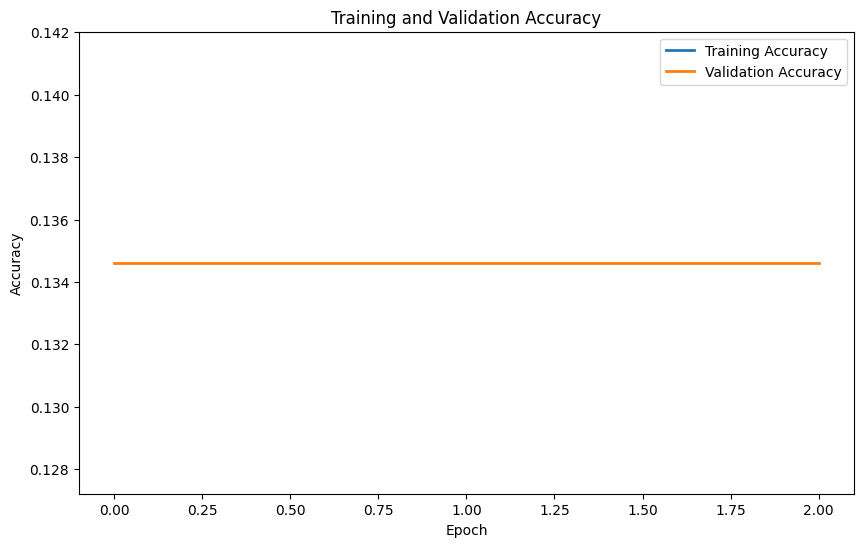

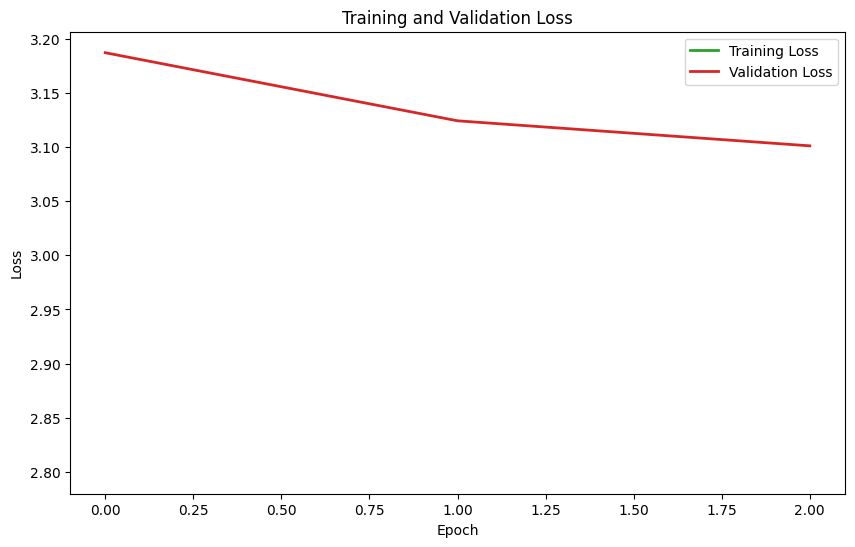

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='tab:blue', linewidth=2)  # Set linewidth to make the line bold
plt.plot(eval_accuracy, label='Validation Accuracy', color='tab:orange', linewidth=2)  # Set linewidth to make the line bold
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('training_validation_accuracy.png') 

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='tab:green', linewidth=2)  # Set linewidth to make the line bold
plt.plot(eval_loss, label='Validation Loss', color='tab:red', linewidth=2)  # Set linewidth to make the line bold
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('training_validation_loss.png') 


In [ ]:
# Prepare test dataset for predictions
tokenized_test = pipeline(test_df, label_mapping)
tokenized_test = tokenized_test.remove_columns('target')

# Get predictions
preds = trainer.predict(tokenized_test)

# Create a reverse mapping for classification report
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Convert the test labels to numeric
test_df['numeric_labels'] = test_df['target'].map(label_mapping)

# Process predictions for classification report
preds_flat = [np.argmax(x) for x in preds[0]]


Map: 100%|██████████| 52/52 [00:00<00:00, 4656.46 examples/s]
/home/editha/model/.venv/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


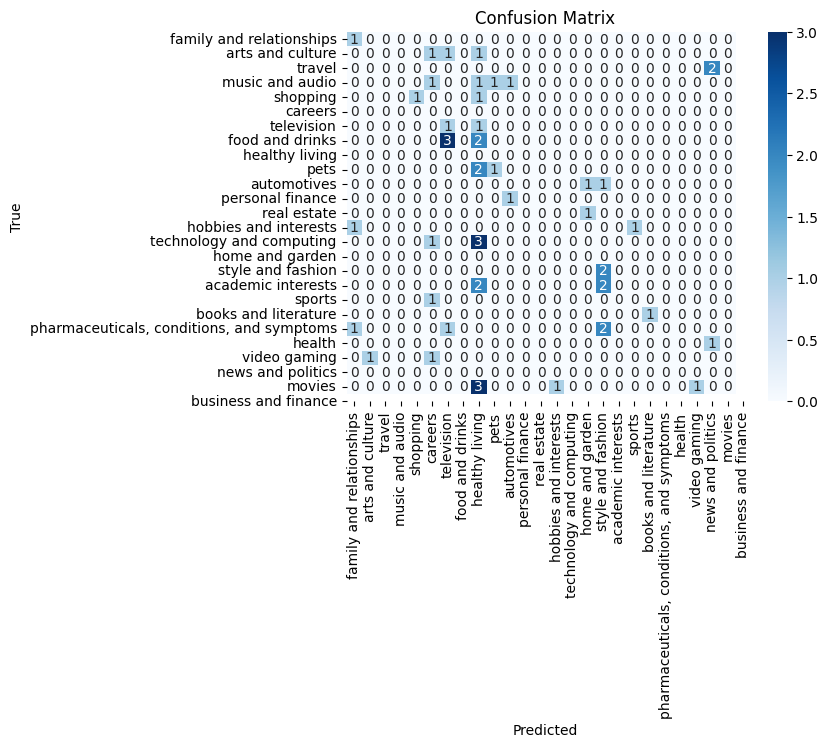

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_df['numeric_labels'], preds_flat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png') 
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(test_df['numeric_labels'], preds_flat, zero_division=0)

# Print the full classification report
print(report)


              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         0
           7       0.17      0.50      0.25         2
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         0
          10       0.50      0.33      0.40         3
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         0
          17       0.29      1.00      0.44         2
          18       0.00    

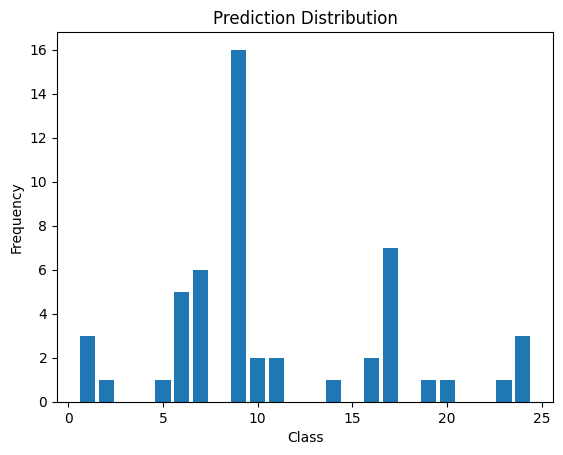

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

unique_preds = np.unique(preds_flat)
counts = [preds_flat.count(x) for x in unique_preds]

plt.bar(unique_preds, counts)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Prediction Distribution')
plt.savefig('prediction_distribuition.png') 
plt.show()


In [ ]:
# Save the model
trainer.save_model('modelsroberta')
